# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (ARIMA, Source, Est)
from lib import (stack, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
nsample = 1000

def comparison(φ_vals, σ, ylim, *params):
    title = "AR(p) Comparison Plot"
    labels = [f"φ={val}" for val in φ_vals] 
    scan = Source.AR.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    return scan

## Simulations

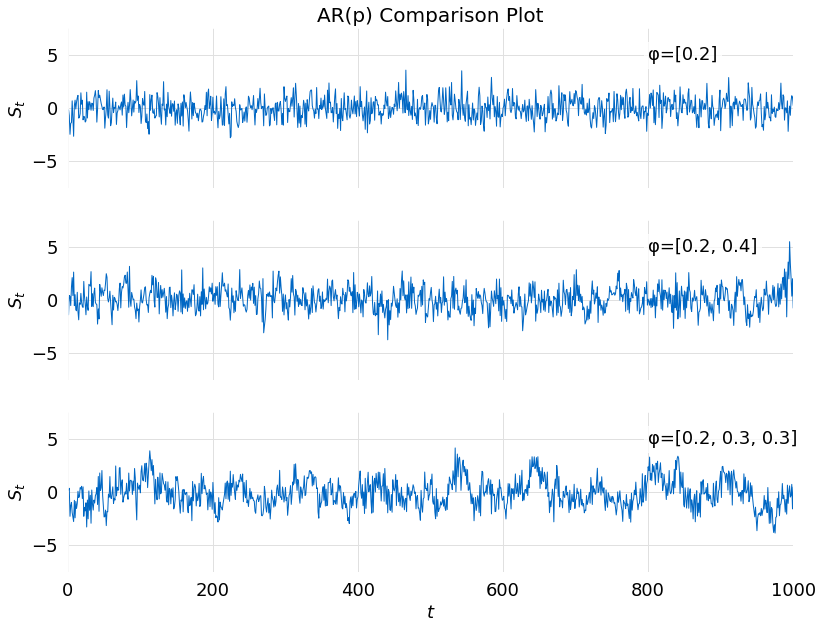

In [3]:
σ = 1.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-7.5, 7.5], *params)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example $\varphi = 0.2$

In [4]:
df = ARIMA.Func.PACF.apply(ar[0], nlags=1)
df.head()

,τ,ρ(τ)
1,1.0,0.173334


In [5]:
results = Est.AR.perform(ar[0], order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1387.814
Date:                Sat, 18 Jun 2022   AIC                           2781.628
Time:                        17:25:05   BIC                           2796.355
Sample:                             0   HQIC                          2787.225
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.037     -0.032      0.975      -0.074       0.072
ar.L1          0.1732      0.033      5.273      0.000       0.109       0.238
sigma2         0.9370      0.042     22.378      0.000       0.855       1.019
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.60
Prob(Q):                              0.88   Prob(JB):                         0.27
Heteroskedasticity (H):               0.99   Skew:                             0.12
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
ar[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 17:25:05',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(1)-Simulation-a17ceb53-e638-4a23-9876-8dc53722ebc7',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 1.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(1)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': -0.001176561812006342,
     'Error': 0.03718158305749813,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.1731861478234063,
      'Error': 0.03284324201484817,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 0.9370090066348721,
     'Error': 0.04187228301176794,
   

### AR(2) Example $\varphi = [0.2, 0.4]$

In [7]:
df = ARIMA.Func.PACF.apply(ar[1], nlags=2)
df.head()

,τ,ρ(τ)
1,1.0,0.158770
2,2.0,0.341425


In [8]:
results = Est.AR.perform(ar[1], order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1433.998
Date:                Sat, 18 Jun 2022   AIC                           2875.997
Time:                        17:25:05   BIC                           2895.632
Sample:                             0   HQIC                          2883.459
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0838      0.064      1.301      0.193      -0.042       0.210
ar.L1          0.1578      0.028      5.660      0.000       0.103       0.212
ar.L2          0.3425      0.028     12.086      0.000       0.287       0.398
sigma2         1.0273      0.044     23.309      0.000       0.941       1.114
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.32
Prob(Q):                              0.90   Prob(JB):                         0.07
Heteroskedasticity (H):               0.97   Skew:                             0.14
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ar[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 17:25:05',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(2)-Simulation-d730703e-9b4b-4cdc-81ab-b5ac9c58da48',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(2)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': 0.0837802234671102,
     'Error': 0.06439487244278504,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.15777080007583666,
      'Error': 0.02787450120150793,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.34252847141707676,
      'Error': 0.028342004506157523,
      '

### AR(3) Example $\varphi = [0.2, 0.3, 0.3]$

In [10]:
df = ARIMA.Func.PACF.apply(ar[2], nlags=3)
df.head()

,τ,ρ(τ)
1,1.0,0.221916
2,2.0,0.325853
3,3.0,0.229765


In [11]:
results = Est.AR.perform(ar[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1430.875
Date:                Sat, 18 Jun 2022   AIC                           2871.749
Time:                        17:25:05   BIC                           2896.293
Sample:                             0   HQIC                          2881.077
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1067      0.143     -0.746      0.456      -0.387       0.174
ar.L1          0.2215      0.030      7.395      0.000       0.163       0.280
ar.L2          0.3254      0.030     10.879      0.000       0.267       0.384
ar.L3          0.2293      0.030      7.747      0.000       0.171       0.287
sigma2         1.0204      0.049     20.648      0.000       0.924       1.117
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.07
Prob(Q):                              0.96   Prob(JB):                         0.21
Heteroskedasticity (H):               0.89   Skew:                             0.05
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ar[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 17:25:05',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(3)-Simulation-2e89adec-e986-4d5e-a539-ed7b3d780c01',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 1.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': -0.10674827756917254,
     'Error': 0.14312889596803488,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.22145904435379016,
      'Error': 0.029947916166816736,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.3253725869252313,
      'Error': 0.029909340146780736,


## Simulations $\sigma = 5.0$

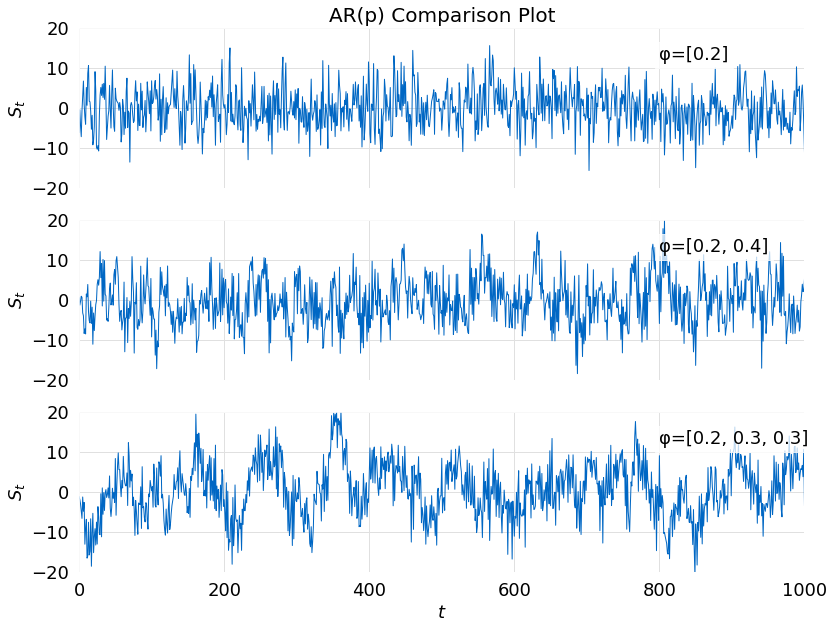

In [13]:
σ = 5.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-20.0, 20.0], *params)

### AR(1) Example ($\varphi = 0.2$)

In [14]:
df = ARIMA.Func.PACF.apply(ar[0], nlags=1)
df.head()

,τ,ρ(τ)
1,1.0,0.19022


In [15]:
results = Est.AR.perform(ar[0], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3024.793
Date:                Sat, 18 Jun 2022   AIC                           6059.586
Time:                        17:25:06   BIC                           6084.130
Sample:                             0   HQIC                          6068.914
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.195      0.076      0.940      -0.367       0.396
ar.L1          0.1870      0.033      5.695      0.000       0.123       0.251
ar.L2          0.0302      0.032      0.939      0.348      -0.033       0.093
ar.L3         -0.0253      0.033     -0.771      0.440      -0.090       0.039
sigma2        24.6713      1.118     22.060      0.000      22.479      26.863
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.97   Prob(JB):                         0.80
Heteroskedasticity (H):               0.94   Skew:                             0.05
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
ar[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 17:25:06',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(1)-Simulation-246ca5b5-16cf-4811-a255-d3fecee8786d',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': 0.014734447808855017,
     'Error': 0.19473600014606943,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.18704314171208516,
      'Error': 0.032844255181574925,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.030209783049397025,
      'Error': 0.03218511507046534,
      'Es

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [17]:
df = ARIMA.Func.PACF.apply(ar[1], nlags=2)
df.head()

,τ,ρ(τ)
1,1.0,0.187493
2,2.0,0.429866


In [18]:
results = Est.AR.perform(ar[1], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3039.207
Date:                Sat, 18 Jun 2022   AIC                           6088.414
Time:                        17:25:06   BIC                           6112.958
Sample:                             0   HQIC                          6097.742
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2633      0.416     -0.634      0.526      -1.078       0.551
ar.L1          0.1910      0.032      5.968      0.000       0.128       0.254
ar.L2          0.4310      0.029     14.800      0.000       0.374       0.488
ar.L3         -0.0081      0.032     -0.251      0.802      -0.071       0.055
sigma2        25.3795      1.161     21.867      0.000      23.105      27.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.99   Prob(JB):                         0.31
Heteroskedasticity (H):               1.18   Skew:                             0.11
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ar[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 17:25:06',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(2)-Simulation-3c367aa2-d2a2-4759-82f2-ee66aea42782',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': -0.2633445347601923,
     'Error': 0.4156242824886865,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.19095255512088755,
      'Error': 0.03199854154371707,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.43101781305824566,
      'Error': 0.029123331489168718,
      '

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [20]:
df = ARIMA.Func.PACF.apply(ar[2], nlags=3)
df.head()

,τ,ρ(τ)
1,1.0,0.113211
2,2.0,0.370004
3,3.0,0.366137


In [21]:
results = Est.AR.perform(ar[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2976.929
Date:                Sat, 18 Jun 2022   AIC                           5963.857
Time:                        17:25:06   BIC                           5988.401
Sample:                             0   HQIC                          5973.185
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4808      0.990      0.485      0.627      -1.460       2.422
ar.L1          0.1110      0.029      3.791      0.000       0.054       0.168
ar.L2          0.3703      0.028     13.111      0.000       0.315       0.426
ar.L3          0.3670      0.029     12.584      0.000       0.310       0.424
sigma2        22.3935      1.123     19.936      0.000      20.192      24.595
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 7.90
Prob(Q):                              0.60   Prob(JB):                         0.02
Heteroskedasticity (H):               0.96   Skew:                            -0.09
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
ar[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 17:25:06',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(3)-Simulation-c0c193c3-33b5-4251-83f9-f6cf6e5b5f17',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 5.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': 0.4807848730363008,
     'Error': 0.9903897462798322,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.11102079802296799,
      'Error': 0.02928371348510724,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.3702930324870748,
      'Error': 0.028241976109823343,
    